In [131]:
import numpy as np
from statistics import mean
import random

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# y = mx + b (m is slope and b is y-intercept)
# m is going to be our best slope!
# m = mean(x).mean(y) - mean(xy) / mean(x^2) - mean(x^2)
# b = mean(y) - m* mean(x)
# regression is just a straight line

In [132]:
# sample data
xs = np.array([1,2,3,4,5,6,7], dtype=np.float64)
ys = np.array([5,4,6,7,8,8,12], dtype=np.float64)

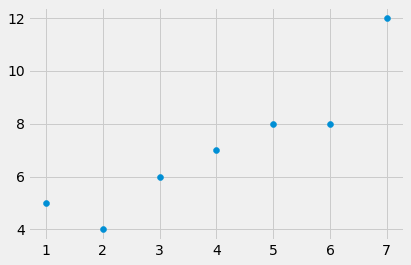

In [133]:
plt.scatter(xs,ys)
plt.show()

In [134]:
def create_data(hm, variance, step=2, correlation=False):
    ys = []
    val =1
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation =='pos':
            val +=step
        elif correlation and correlation =='neg':
            val -=step
    xs = [i for i in range(len(ys))]
        
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    
def best_fit_slope_intercept(xs,ys):
    '''
    xs and ys are the data points
    the equation for line is y = mx + b
    m = mean(xs) * mean(ys) - mean(xs*ys) / mean(xs**2) - mean(xs**2)
    b = mean(ys) - m * mean(xs)

    '''
    m = (  ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
           ((mean(xs)**2) - mean(xs**2))
        )

    b = mean(ys) - m * mean(xs)
    return m,b

xs,ys = create_data(100,50, 2, correlation='pos')
m,b = best_fit_slope_intercept(xs,ys)
regression_lines = [(m*x)+b for x in xs]

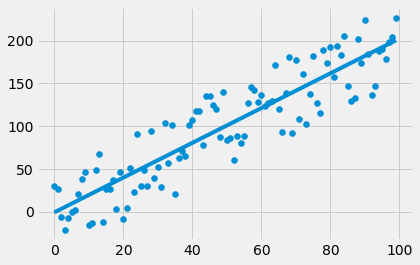

In [135]:
plt.scatter(xs,ys)
plt.plot(xs, regression_lines)
plt.show()

15.527296729672926


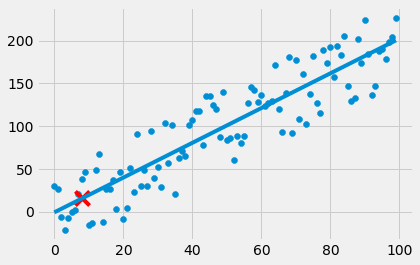

In [136]:
# now let's predict
predict_x = 8
predcit_y = m*predict_x + b
print(predcit_y)

plt.scatter(xs,ys)
plt.scatter(predict_x, predcit_y, s=200, color='r', marker='x')
plt.plot(xs, regression_lines)
plt.show()

In [127]:
# r^2 to find which line is the best fit
# Equation: r^2 = 1 - (SE*(y_hat)/SE*mean(y))

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)
    
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_req = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_req - squared_error_y_mean)
    
r_squared =   coefficient_of_determination(ys, regression_lines)
print(r_squared)

324863.09095709585
